### Test où le tri se fait sur l'entrainement

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
list_score_sbert = [
    [0,0.5043409629044988],
    [1,0.49329123914759276],
    [2,0.5122336227308603],
    [3,0.4964483030781373],
    [4,0.5872138910812944],
    [5,0.5864246250986582],
    [6,0.4956590370955012],
    [7,0.6385161799526441],
    [8,0.5027624309392266],
    [9,0.6243093922651933]
]

(0.0, 1.0)

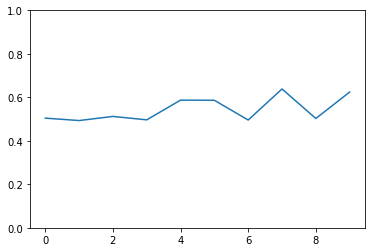

In [3]:
plt.plot(list(pd.DataFrame(list_score_sbert)[0]),
         list(pd.DataFrame(list_score_sbert)[1]))
plt.ylim([0,1])

(0.0, 1.0)

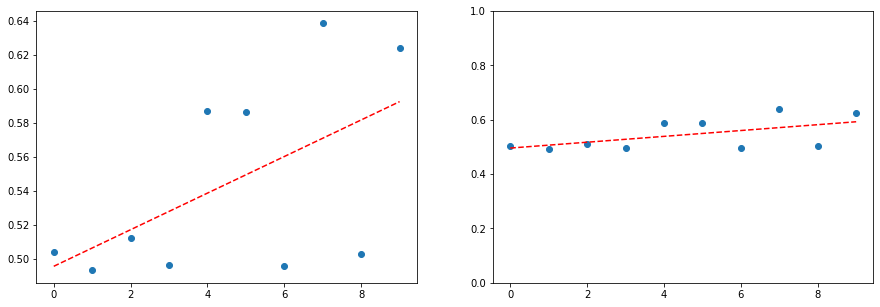

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(list(pd.DataFrame(list_score_sbert)[0]),
            list(pd.DataFrame(list_score_sbert)[1]))
z = np.polyfit(list(pd.DataFrame(list_score_sbert)[0]),
               list(pd.DataFrame(list_score_sbert)[1]),
               1)
p = np.poly1d(z)
plt.plot(list(pd.DataFrame(list_score_sbert)[0]),
         p(list(pd.DataFrame(list_score_sbert)[0])),"r--")
plt.subplot(1,2,2)
plt.scatter(list(pd.DataFrame(list_score_sbert)[0]),
            list(pd.DataFrame(list_score_sbert)[1]))
plt.plot(list(pd.DataFrame(list_score_sbert)[0]),
         p(list(pd.DataFrame(list_score_sbert)[0])),"r--")
plt.ylim([0,1])

Cadre de l'expérience :
- 10 différents training sets (*splitted_xl_sbert_0*,...,*splitted_xl_sbert_9*)
- Mesure :
    - similarité cosine appliquée aux vecteurs SBERT
    - on calcule la matrice donnant cette mesure pour l'ensemble des schemas du set xl avec le test set
    - on retient la moyenne du dernier décile pour chaque texte du set xl comme valeur de référence
- *splitted_xl_sbert_0* est le data set avec les valeurs de référence les plus élevées
- *splitted_xl_sbert_9* est le data set avec les valeurs de référence les moins élevées

Résultats de l'expérience:
- Valeurs très proches (environ 0.5)
- légère tendance à être plus performant lorsque le data set est plus "varié" (car observation de plus de cas différents)
- **A noter** : le résultat dépend fortement de la taille du data set d'entrainement $\rightarrow$ on comprend mieux ce résultat contre intuitif
- **A tester** : data set ordonné selon le max pour chaque schema du set xl (distribution plus étalée que pour la moy $10^{ème}$ décile, moy et med

In [5]:
xl : 0.77
l : 0.7
m : 0.55
s : 0.51

### Fonctions

In [6]:
def plot_results_max(column):

    df_sorted = list(df_labels.sort_values(column)[column])
    df_sorted_identical = list(df_labels.sort_values(column)['is_identical'])

    count = 0
    l = [0]
    for i in range(len(df_sorted)):
        #print(df_sorted_max_sbert[i])
        if count+0.1<=df_sorted[i]:
            count+=0.1
            l.append(i)
            #print('yes')
    list_scores_range = [np.mean(df_sorted_identical[l[i]:l[i+1]]) for i in range(len(l)-1)]

    l11 = []
    for i in range(12):
        l11.append(np.mean(df_sorted[i*100:(i+1)*100]))
    l11 += [np.mean(df_sorted[1200:])]
    l21 = []
    for i in range(12):
        l21.append(np.mean(df_sorted_identical[i*100:(i+1)*100]))
    l21 += [np.mean(df_sorted_identical[1200:])]

    l12 = []
    for i in range(126):
        l12.append(np.mean(df_sorted[i*10:(i+1)*10]))
    l12 += [np.mean(df_sorted[1260:])]
    l22 = []
    for i in range(126):
        l22.append(np.mean(df_sorted_identical[i*10:(i+1)*10]))
    l22 += [np.mean(df_sorted_identical[1260:])]


    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.scatter([0.1 * i for i in range(len(list_scores_range))],list_scores_range)
    plt.xlabel(f'{column}')
    plt.ylabel('Accuracy for the given bracket')
    plt.subplot(2,2,2)
    plt.xlabel(f'{column}')
    plt.ylabel('Accuracy for the given bracket')
    plt.scatter([0.1 * i for i in range(len(list_scores_range))],list_scores_range)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.subplot(2,2,3)
    plt.scatter(l11,l21)
    plt.title('plot for 10 points',loc='right')
    plt.xlabel(f'{column}')
    plt.ylabel('Accuracy for the given bracket')
    plt.subplot(2,2,4)
    plt.title('plot for 100 points',loc='right')
    plt.xlabel(f'{column}')
    plt.ylabel('Accuracy for the given bracket')
    plt.scatter(l12,l22)
    plt.show()

### Preprocessing

In [7]:
matrice_sbert = pd.read_csv('scores_matrix/matrix_sbert.csv')
matrice_sbert = matrice_sbert.drop('Unnamed: 0',axis=1)
matrice_syntax_postag = pd.read_csv('scores_matrix/matrix_syntax_postag.csv')
matrice_syntax_postag = matrice_syntax_postag.drop('Unnamed: 0',axis=1)
matrice_syntax_tree = pd.read_csv('scores_matrix/matrix_syntax_tree.csv')
matrice_syntax_tree = matrice_syntax_tree.drop('Unnamed: 0',axis=1)

In [8]:
with open("predictions/dev-labels.lst") as f:
    lineList_dev = f.readlines()
true_labels = [int(element.replace('\n','')) for element in lineList_dev]

with open("predictions/predictions_test.lst") as f:
    lineList_dev = f.readlines()
test_labels = [int(element.replace('\n', '')) for element in lineList_dev]

In [9]:
def for_df(x,y):
    if x==y:
        return 1
    else:
        return 0

In [10]:
df_labels = pd.DataFrame(np.transpose([true_labels,test_labels]),
                         columns=['true_labels','test_labels'])
df_labels['is_identical'] = df_labels.apply(lambda x: for_df(x.test_labels, x.true_labels), axis=1)
df_labels

,true_labels,test_labels,is_identical
0,2,1,0
1,1,1,1
2,2,2,1
3,1,1,1
4,1,1,1
...,...,...,...
1262,1,1,1
1263,1,1,1
1264,1,2,0
1265,1,1,1


### Ordonnation sur le test - SBERT

In [11]:
df_labels['max_sbert'] = list(matrice_sbert.max())
df_labels


,true_labels,test_labels,is_identical,max_sbert
0,2,1,0,0.886177
1,1,1,1,0.871552
2,2,2,1,0.818636
3,1,1,1,0.904500
4,1,1,1,0.853596
...,...,...,...,...
1262,1,1,1,0.820505
1263,1,1,1,0.814636
1264,1,2,0,0.844037
1265,1,1,1,0.840069


In [12]:
df_labels['mean_sbert'] = list(matrice_sbert.mean())

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


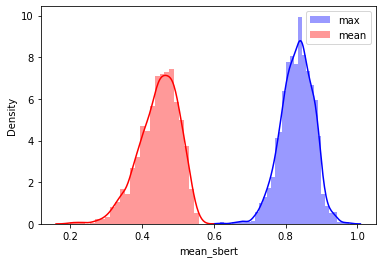

In [13]:
sns.distplot(df_labels['max_sbert'],color='blue',label='max')
sns.distplot(df_labels['mean_sbert'],color='red',label='mean')
plt.legend()
plt.show()

In [14]:
df_labels.sort_values('max_sbert')

,true_labels,test_labels,is_identical,max_sbert,mean_sbert
700,1,1,1,0.616939,0.221632
1007,2,2,1,0.652986,0.200739
479,2,2,1,0.664795,0.317005
825,1,1,1,0.673522,0.340085
1072,2,1,0,0.681998,0.338925
...,...,...,...,...,...
1097,1,2,0,0.940131,0.460562
663,2,1,0,0.940938,0.343805
281,1,1,1,0.948023,0.454215
323,2,2,1,0.964846,0.389894


c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


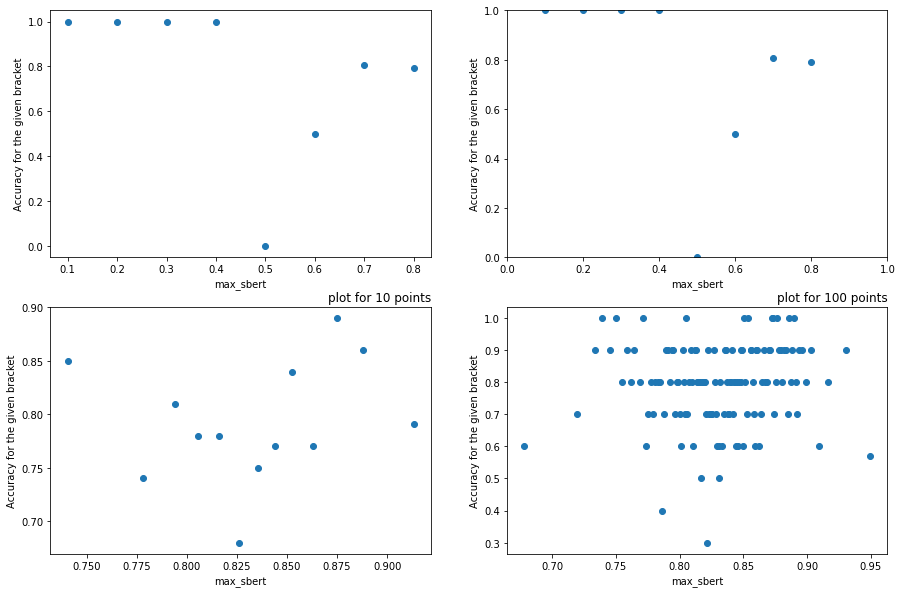

In [15]:
plot_results_max('max_sbert')

In [16]:
df_labels.sort_values('max_sbert')['max_sbert']

700     0.616939
1007    0.652986
479     0.664795
825     0.673522
1072    0.681998
          ...   
1097    0.940131
663     0.940938
281     0.948023
323     0.964846
715     0.975880
Name: max_sbert, Length: 1267, dtype: float64

<Figure size 360x360 with 0 Axes>

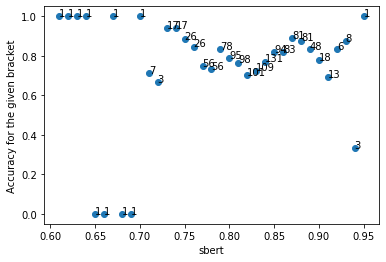

In [17]:
df_sorted = list(df_labels.sort_values('max_sbert')['max_sbert'])
df_sorted_identical = list(df_labels.sort_values('max_sbert')['is_identical'])
dcount = 0.01
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_identical[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'sbert')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))

c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


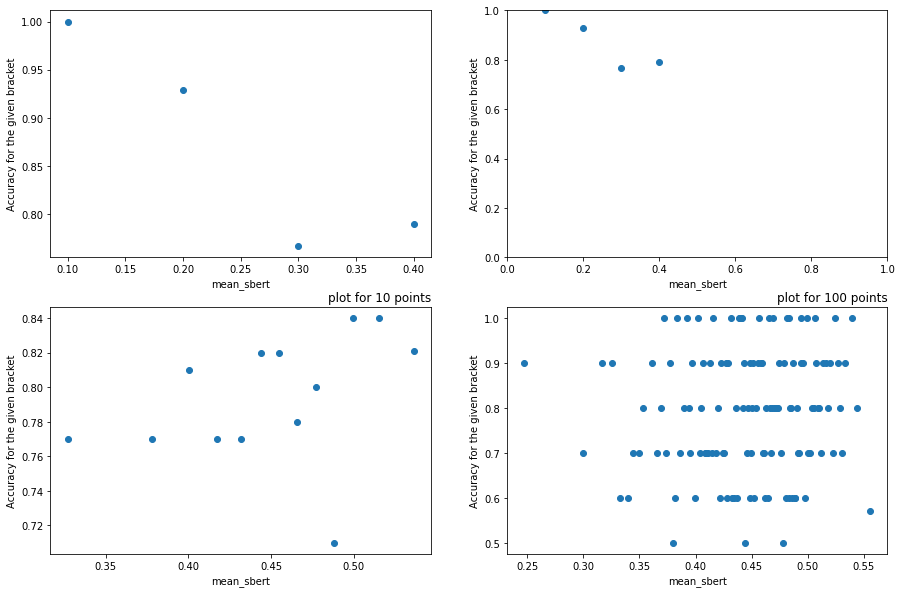

In [18]:
plot_results_max('mean_sbert')

### Ordonnation sur le test - postag

In [19]:
df_labels['max_postag'] = list(matrice_syntax_postag.max())
df_labels['mean_postag'] = list(matrice_syntax_postag.mean())

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


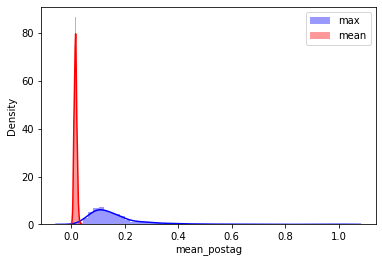

In [20]:
sns.distplot(df_labels['max_postag'],color='blue',label='max')
sns.distplot(df_labels['mean_postag'],color='red',label='mean')
plt.legend()
plt.show()

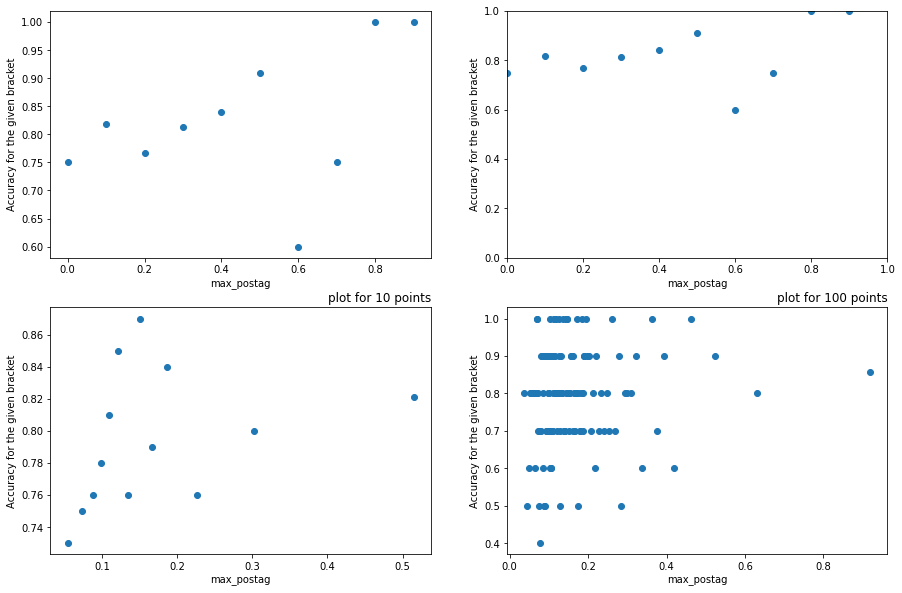

In [21]:
plot_results_max('max_postag')

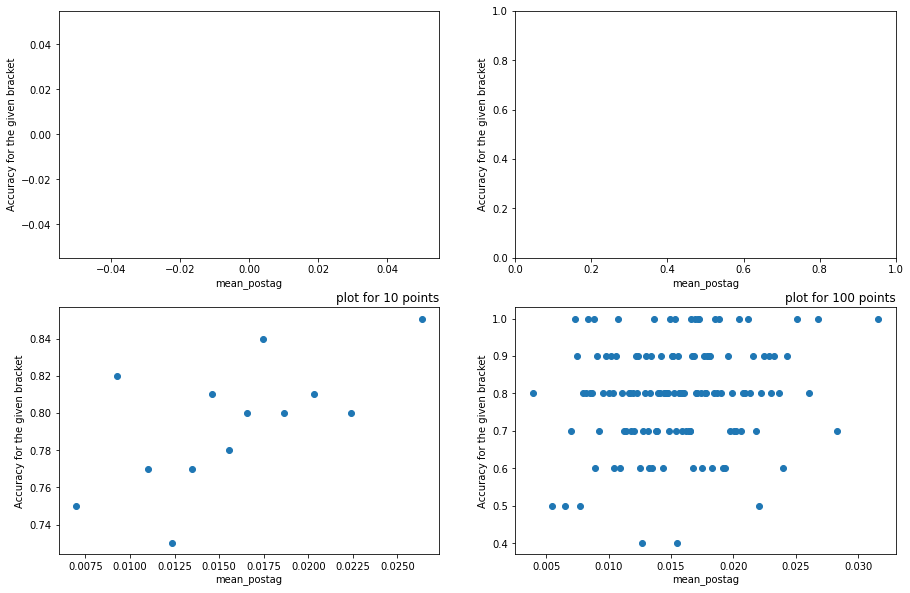

In [22]:
plot_results_max('mean_postag')

<Figure size 360x360 with 0 Axes>

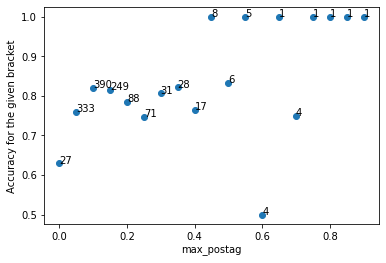

In [23]:
df_sorted = list(df_labels.sort_values('max_postag')['max_postag'])
df_sorted_identical = list(df_labels.sort_values('max_postag')['is_identical'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_identical[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'max_postag')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))

### Ordonnation sur le test - tree

In [24]:
df_labels['max_tree'] = list(matrice_syntax_tree.max())
df_labels['mean_tree'] = list(matrice_syntax_tree.mean())

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


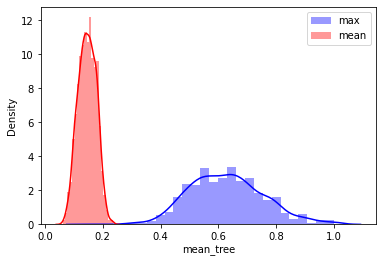

In [25]:
sns.distplot(df_labels['max_tree'],color='blue',label='max')
sns.distplot(df_labels['mean_tree'],color='red',label='mean')
plt.legend()
plt.show()

c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


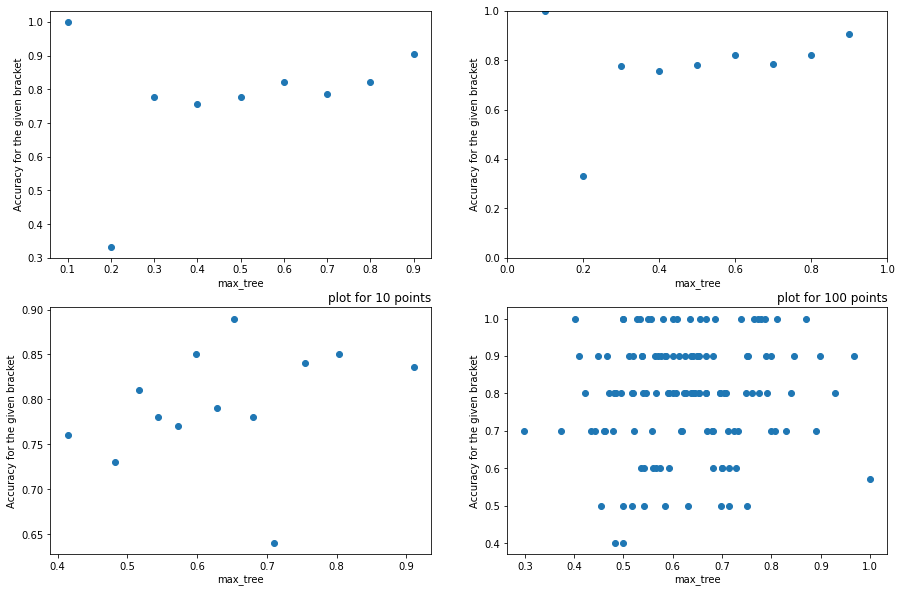

In [26]:
plot_results_max('max_tree')

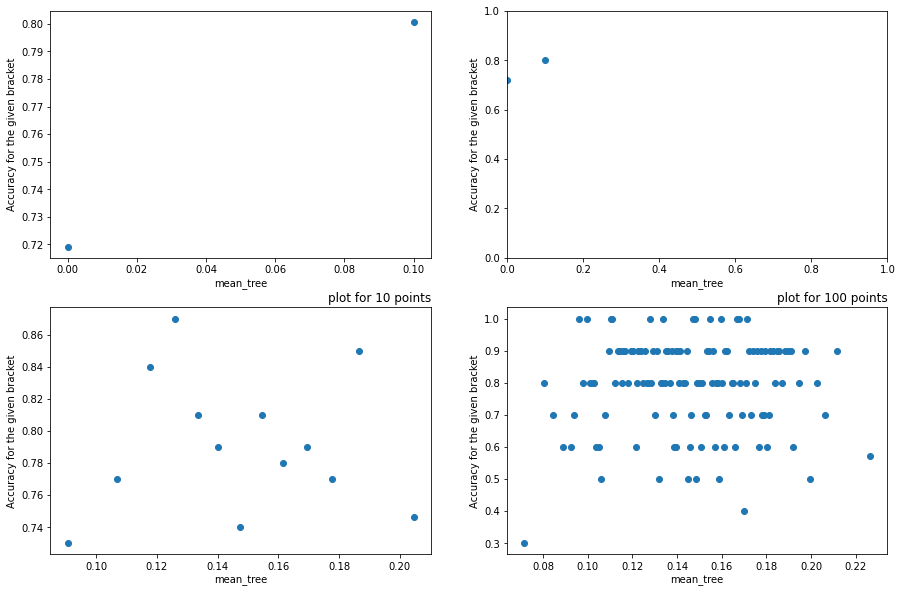

In [27]:
plot_results_max('mean_tree')

<Figure size 360x360 with 0 Axes>

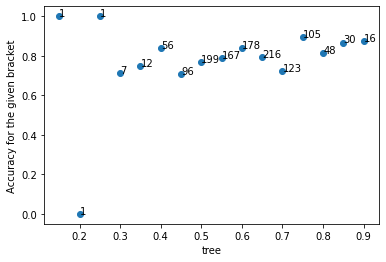

In [28]:
df_sorted = list(df_labels.sort_values('max_tree')['max_tree'])
df_sorted_identical = list(df_labels.sort_values('max_tree')['is_identical'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_identical[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'tree')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))

Text(0, 0.5, 'sbert')

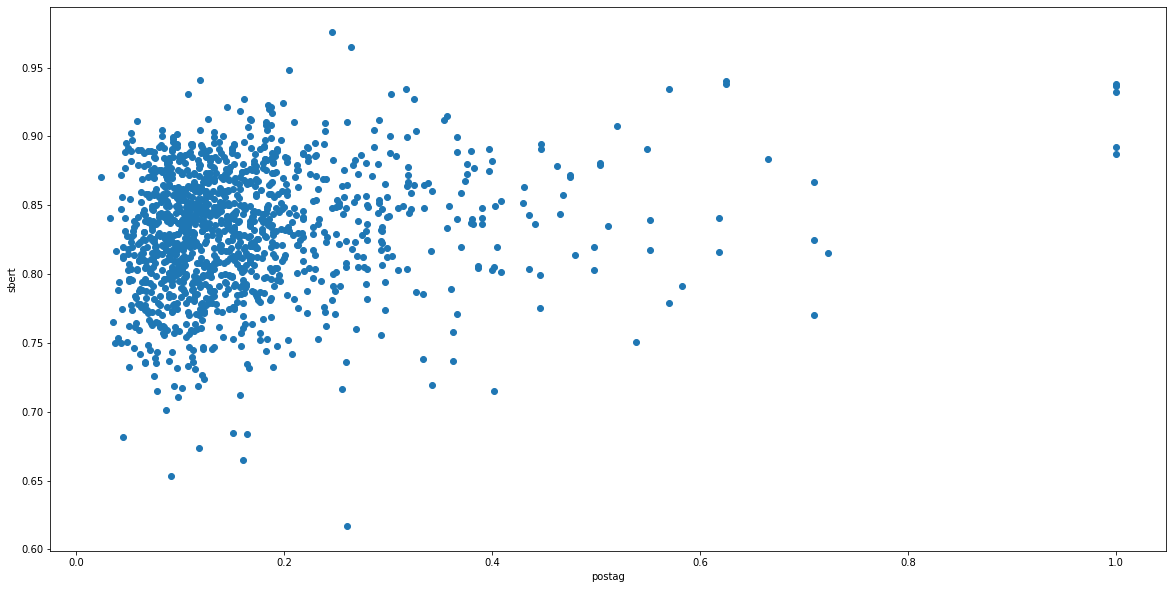

In [29]:
plt.figure(figsize=(20,10))
plt.scatter(df_labels['max_postag'],df_labels['max_sbert'])
plt.xlabel('postag')
plt.ylabel('sbert')
#checker en centrant + réduisant

In [30]:
df_to_compare = pd.DataFrame(np.transpose([list(df_labels['max_postag']),
                              list(df_labels['max_sbert']),
                              list(df_labels['max_tree'])]),
                             columns=['max_postag','max_sbert','max_tree'])
df_to_compare = (df_to_compare-df_to_compare.mean())/df_to_compare.std()

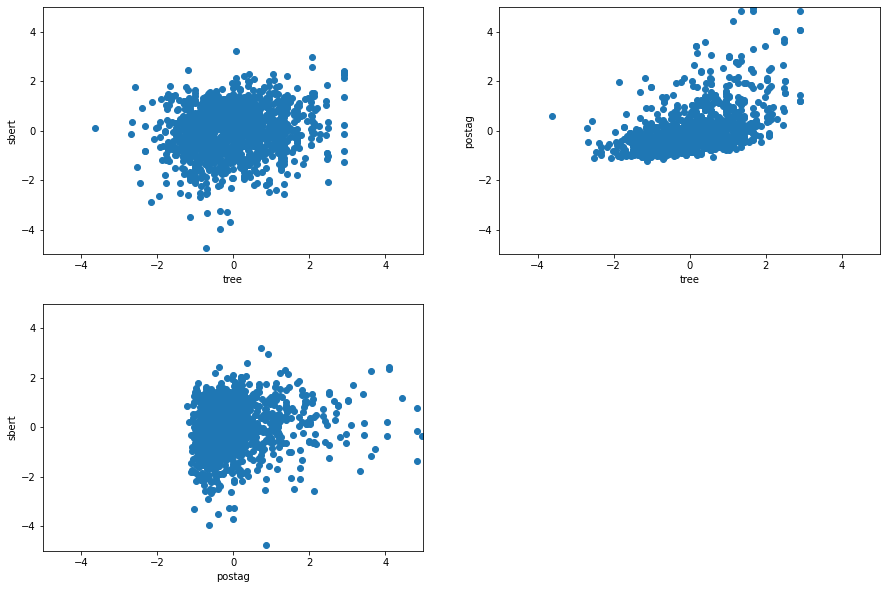

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('tree')
plt.ylabel('sbert')
plt.scatter(df_to_compare['max_tree'],df_to_compare['max_sbert'])
plt.subplot(2,2,2)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('tree')
plt.ylabel('postag')
plt.scatter(df_to_compare['max_tree'],df_to_compare['max_postag'])
plt.subplot(2,2,3)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('postag')
plt.ylabel('sbert')
plt.scatter(df_to_compare['max_postag'],df_to_compare['max_sbert'])

In [32]:

df_labels[df_labels['is_identical']==1].sort_values('max_sbert')

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree
700,1,1,1,0.616939,0.221632,0.260000,0.019093,0.538462,0.131482
1007,2,2,1,0.652986,0.200739,0.090909,0.013806,0.583333,0.143142
479,2,2,1,0.664795,0.317005,0.160643,0.014404,0.619048,0.164065
825,1,1,1,0.673522,0.340085,0.117550,0.014088,0.485714,0.103230
1240,1,1,1,0.684273,0.346010,0.151007,0.013885,0.583333,0.126629
...,...,...,...,...,...,...,...,...,...
394,1,1,1,0.936929,0.488205,1.000000,0.016640,1.000000,0.134084
1251,2,2,1,0.938100,0.430067,1.000000,0.033709,1.000000,0.127644
281,1,1,1,0.948023,0.454215,0.204724,0.019283,0.894737,0.187469
323,2,2,1,0.964846,0.389894,0.264463,0.018086,0.894737,0.134741


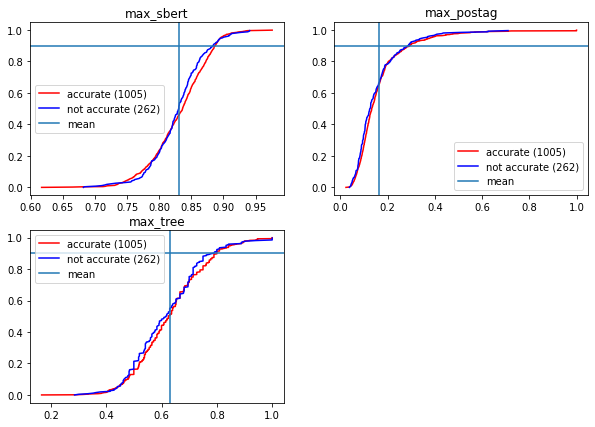

In [33]:
plt.figure(figsize=(10,7))
for met,count in [['max_sbert',1],['max_postag',2],['max_tree',3]]:
    plt.subplot(2,2,count)
    plt.title(f'{met}')
    list_isid = list(df_labels[df_labels['is_identical']==1].sort_values(met)[met])
    plt.plot(list_isid,[i/len(list_isid) for i in range(len(list_isid))],label=f'accurate ({len(list_isid)})',color='red')
    list_isid = list(df_labels[df_labels['is_identical']==0].sort_values(met)[met])
    plt.plot(list_isid,[i/len(list_isid) for i in range(len(list_isid))],label=f'not accurate ({len(list_isid)})', color = 'blue')
    plt.axvline(df_labels[met].mean(),label='mean')
    plt.axhline(0.9)
    plt.legend()

Text(0.5, 0.5, 'tree')

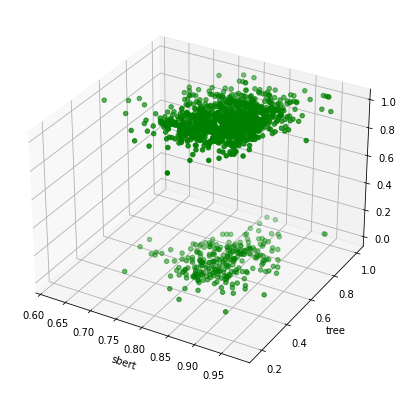

In [34]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_labels['max_sbert'], df_labels['max_tree'], df_labels['is_identical'], color = "green")
plt.xlabel('sbert')
plt.ylabel('tree')

In [35]:
df_labels

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree
0,2,1,0,0.886177,0.452219,0.230769,0.011784,0.777778,0.139553
1,1,1,1,0.871552,0.466545,0.230769,0.015038,0.777778,0.139553
2,2,2,1,0.818636,0.507991,0.149051,0.010764,0.461538,0.117724
3,1,1,1,0.904500,0.441542,0.286432,0.029332,0.652174,0.150080
4,1,1,1,0.853596,0.429754,0.082353,0.007494,0.541667,0.151310
...,...,...,...,...,...,...,...,...,...
1262,1,1,1,0.820505,0.486912,0.117816,0.017778,0.535714,0.150006
1263,1,1,1,0.814636,0.382487,0.095588,0.017919,0.592593,0.122891
1264,1,2,0,0.844037,0.405598,0.081776,0.011029,0.642857,0.187028
1265,1,1,1,0.840069,0.484510,0.366534,0.026824,0.640000,0.139378


## Considération proba

In [36]:
with open("predictions/predictions_test.lst") as f:
    lineList_dev = f.readlines()
test_labels_proba = [int(element.replace('\n', '')) for element in lineList_dev]

In [37]:
def change_form(x):
    return [float(i) for i in x[2:-2].split()]

In [38]:
a = pd.read_csv('predictions/predictions_test_proba.csv',sep=';',header=None)
a[1] = a[1].apply(change_form)

In [39]:
list(a[1])

[[5.0213194, -5.833286],
 [2.3608248, -6.932063],
 [9.429515, 15.50737],
 [15.58206, -14.36882],
 [12.558033, -11.74112],
 [3.7612534, -7.294478],
 [15.175407, -15.85599],
 [16.1576, 15.6213],
 [9.314343, 15.65802],
 [16.155457, 14.42147],
 [15.738669, -16.03894],
 [15.688032, 0.5589723],
 [0.7525398, 2.617728],
 [4.50124, 3.857397],
 [0.7362056, 0.0730418],
 [15.32024, -16.06172],
 [10.354734, -12.18055],
 [1.1095705, 8.264791],
 [15.355788, -13.31441],
 [4.292856, 12.20794],
 [15.959261, 15.13469],
 [16.210812, 15.648643],
 [0.0517354, 0.8666346],
 [8.939929, -15.61609],
 [13.311732, 14.32829],
 [15.089451, -10.9625],
 [-0.14655687, -12.740235],
 [14.196496, -16.0036],
 [15.561975, -15.49946],
 [13.640885, -13.16303],
 [3.707168, 8.46864],
 [11.009879, -13.36305],
 [0.9771459, 14.540905],
 [0.40672, 4.483405],
 [7.948249, -0.6830585],
 [6.5850883, 8.289247],
 [14.48903, -15.88672],
 [15.438654, -15.65349],
 [15.830217, 7.920686],
 [16.011187, 12.68608],
 [15.627978, -15.84635],
 [3.2

In [40]:
df_labels['both_probas'] = list(a[1])

In [41]:
df_labels

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas
0,2,1,0,0.886177,0.452219,0.230769,0.011784,0.777778,0.139553,"[5.0213194, -5.833286]"
1,1,1,1,0.871552,0.466545,0.230769,0.015038,0.777778,0.139553,"[2.3608248, -6.932063]"
2,2,2,1,0.818636,0.507991,0.149051,0.010764,0.461538,0.117724,"[9.429515, 15.50737]"
3,1,1,1,0.904500,0.441542,0.286432,0.029332,0.652174,0.150080,"[15.58206, -14.36882]"
4,1,1,1,0.853596,0.429754,0.082353,0.007494,0.541667,0.151310,"[12.558033, -11.74112]"
...,...,...,...,...,...,...,...,...,...,...
1262,1,1,1,0.820505,0.486912,0.117816,0.017778,0.535714,0.150006,"[15.594703, -15.99087]"
1263,1,1,1,0.814636,0.382487,0.095588,0.017919,0.592593,0.122891,"[5.797847, -5.010811]"
1264,1,2,0,0.844037,0.405598,0.081776,0.011029,0.642857,0.187028,"[11.551912, 6.754648]"
1265,1,1,1,0.840069,0.484510,0.366534,0.026824,0.640000,0.139378,"[-6.587974, -12.45122]"


In [42]:
def proba_for_good(true,list_prob):
    return list_prob[true-1]

In [43]:
df_labels['right_proba'] = df_labels.apply(lambda x: proba_for_good(x.true_labels, x.both_probas), axis=1)

In [44]:
df_labels

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas,right_proba
0,2,1,0,0.886177,0.452219,0.230769,0.011784,0.777778,0.139553,"[5.0213194, -5.833286]",-5.833286
1,1,1,1,0.871552,0.466545,0.230769,0.015038,0.777778,0.139553,"[2.3608248, -6.932063]",2.360825
2,2,2,1,0.818636,0.507991,0.149051,0.010764,0.461538,0.117724,"[9.429515, 15.50737]",15.507370
3,1,1,1,0.904500,0.441542,0.286432,0.029332,0.652174,0.150080,"[15.58206, -14.36882]",15.582060
4,1,1,1,0.853596,0.429754,0.082353,0.007494,0.541667,0.151310,"[12.558033, -11.74112]",12.558033
...,...,...,...,...,...,...,...,...,...,...,...
1262,1,1,1,0.820505,0.486912,0.117816,0.017778,0.535714,0.150006,"[15.594703, -15.99087]",15.594703
1263,1,1,1,0.814636,0.382487,0.095588,0.017919,0.592593,0.122891,"[5.797847, -5.010811]",5.797847
1264,1,2,0,0.844037,0.405598,0.081776,0.011029,0.642857,0.187028,"[11.551912, 6.754648]",11.551912
1265,1,1,1,0.840069,0.484510,0.366534,0.026824,0.640000,0.139378,"[-6.587974, -12.45122]",-6.587974


c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


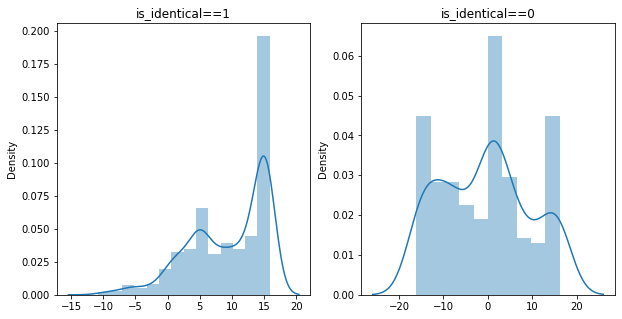

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(list(df_labels[df_labels['is_identical']==1]['right_proba']),bins='auto')
plt.title('is_identical==1')
plt.subplot(1,2,2)
sns.distplot(list(df_labels[df_labels['is_identical']==0]['right_proba']),bins='auto')
plt.title('is_identical==0')
plt.show()

<Figure size 360x360 with 0 Axes>

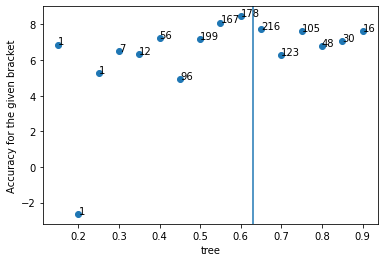

In [57]:
df_sorted = list(df_labels.sort_values('max_tree')['max_tree'])
df_sorted_prob = list(df_labels.sort_values('max_tree')['right_proba'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'tree')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))
plt.axvline(np.mean(list(df_labels['max_tree'])),label='mean')

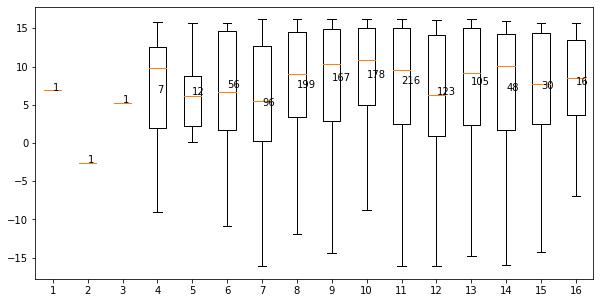

In [93]:
df_sorted = list(df_labels.sort_values('max_tree')['max_tree'])
df_sorted_prob = list(df_labels.sort_values('max_tree')['right_proba'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,10)
ax.boxplot([df_sorted_prob[l[i]:l[i+1]] for i in range(len(l)-1)],
           showfliers=False)
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (range(1,20)[i], np.mean(list(df_sorted_prob[l[i]:l[i+1]]))))

<Figure size 360x360 with 0 Axes>

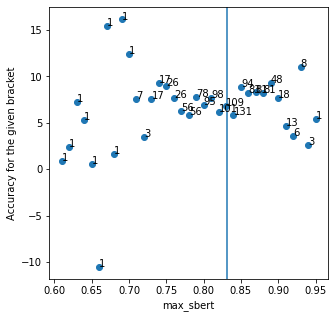

In [81]:
df_sorted = list(df_labels.sort_values('max_sbert')['max_sbert'])
df_sorted_prob = list(df_labels.sort_values('max_sbert')['right_proba'])
dcount = 0.01
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'max_sbert')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))
plt.axvline(np.mean(list(df_labels['max_sbert'])),label='mean')

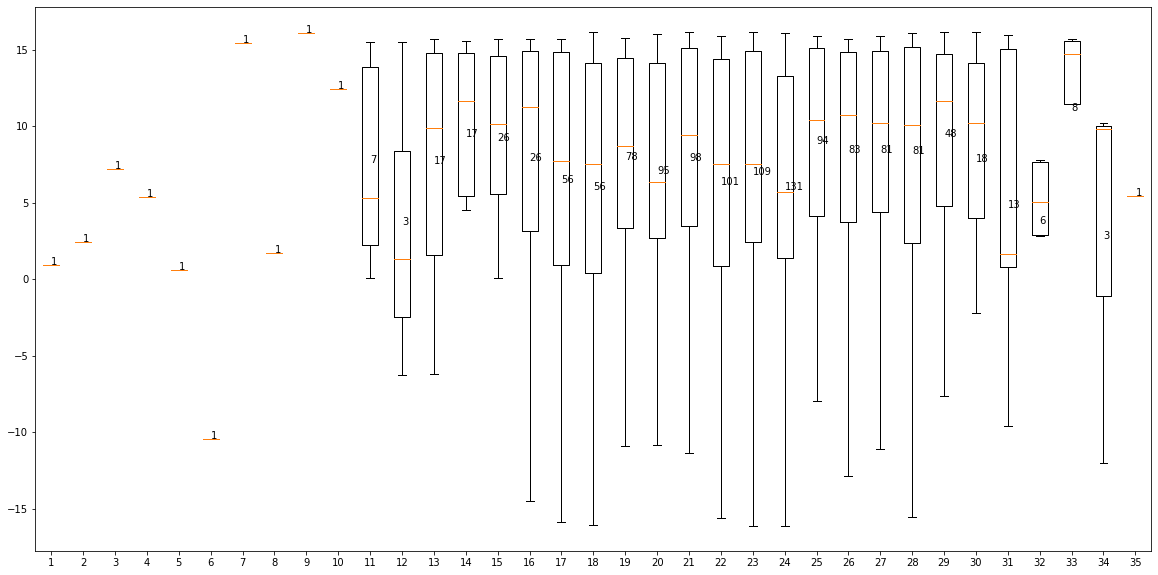

In [89]:
df_sorted = list(df_labels.sort_values('max_sbert')['max_sbert'])
df_sorted_prob = list(df_labels.sort_values('max_sbert')['right_proba'])
dcount = 0.01
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20,20)
ax.boxplot([df_sorted_prob[l[i]:l[i+1]] for i in range(len(l)-1)],
           showfliers=False)
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (range(1,100)[i], np.mean(list(df_sorted_prob[l[i]:l[i+1]]))))

<Figure size 360x360 with 0 Axes>

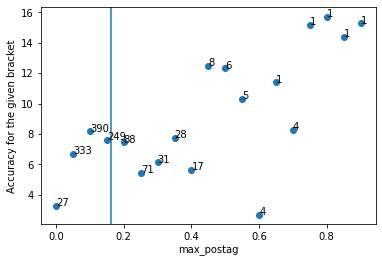

In [59]:
df_sorted = list(df_labels.sort_values('max_postag')['max_postag'])
df_sorted_prob = list(df_labels.sort_values('max_postag')['right_proba'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'max_postag')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))
plt.axvline(np.mean(list(df_labels['max_postag'])),label='mean')

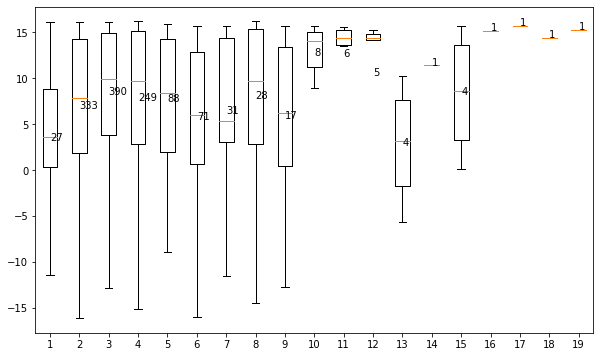

In [74]:
df_sorted = list(df_labels.sort_values('max_postag')['max_postag'])
df_sorted_prob = list(df_labels.sort_values('max_postag')['right_proba'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (30,6)
ax.boxplot([df_sorted_prob[l[i]:l[i+1]] for i in range(len(l)-1)],
           showfliers=False)
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (range(1,20)[i], np.mean(list(df_sorted_prob[l[i]:l[i+1]]))))

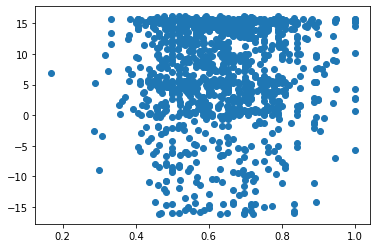

In [47]:
plt.scatter(list(df_labels.sort_values('max_tree')['max_tree']),
            list(df_labels.sort_values('max_tree')['right_proba']))

<Figure size 720x720 with 0 Axes>

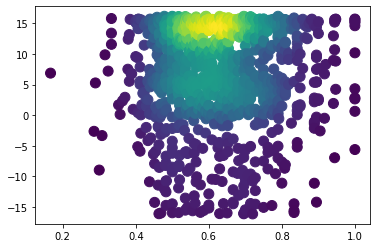

In [49]:
from scipy.stats import gaussian_kde
x,y = list(df_labels.sort_values('max_tree')['max_tree']),list(df_labels.sort_values('max_tree')['right_proba'])
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()